# Script to plot Growth curves
The following script takes the result from Tevan, for example. It is necessary to remove the extra information and the remperature row, and save as an csv.
There is also necessary to have an csv file with the names of each condition (the negatives are identified with -neg)

In [1]:
import pandas as pd

In [2]:
def process_well_plate(input_csv):
    # Load the CSV file with semicolon as delimiter
    df = pd.read_csv(input_csv, header=None, delimiter=';')
    
    formatted_list = []
    
    # Iterate over rows (excluding the header row)
    for index, row in df.iterrows():
        if index == 0:
            continue  # Skip the first row as it contains column numbers

        row_id = row[0]  # Get row label (A, B, C, etc.)

        # Iterate over columns (excluding the first two, which are row labels and NaNs)
        for col_idx in range(1, df.shape[1]):
            col_label = col_idx  # Numeric column labels (1,2,3...)
            value = row[col_idx]  # Get the corresponding value

            well_label = f"{row_id}{col_label}"  # Construct the well identifier

            if pd.notna(value):
                formatted_list.append(f"{well_label},{value}")
            else:
                formatted_list.append(f"{well_label},Empty")

    # Convert list into a dictionary
    data_dict = dict(item.split(',') for item in formatted_list)
    #df = pd.DataFrame([item.split(",") for item in formatted_list], columns=["Well", "Status"])

    #return df
    return data_dict

In [5]:
# Example usage
names_dict = process_well_plate("plan_plaque.csv")
names_dict["Time"] = "Time"

In [6]:
# Load your table into a DataFrame (replace with your actual file path)
data_df= pd.read_csv("CSV_Cphy_carbonsource_tecan_200325.csv",sep=";", decimal=",", header=None) 
data_df['Condition'] = data_df[0].map(names_dict)
data_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,Condition
0,Time,0.0000,1200.1000,2400.1000,3600.1000,4800.1000,6000.2000,7200.2000,8400.2000,9600.3000,...,321607.1000,322807.1000,324007.1000,325207.2000,326407.2000,327607.2000,328807.2000,330007.3000,331207.3000,Time
1,B2,0.1723,0.1751,0.1867,0.1968,0.2111,0.2269,0.2421,0.2421,0.2418,...,0.3236,0.3240,0.3237,0.3240,0.3246,0.3248,0.3250,0.3247,0.3256,GS2-sans source C-neg
2,B3,0.1235,0.1262,0.1303,0.1347,0.1379,0.1427,0.1472,0.1532,0.1588,...,0.3280,0.3291,0.3292,0.3281,0.3286,0.3295,0.3294,0.3293,0.3300,GS2-rhamnose-neg
3,B4,0.1380,0.1425,0.1503,0.1582,0.1650,0.1702,0.1775,0.1852,0.1940,...,0.2599,0.2610,0.2607,0.2607,0.2613,0.2612,0.2613,0.2614,0.2620,GS2-fucose-neg
4,B5,0.1709,0.1758,0.1855,0.1985,0.2045,0.2046,0.2061,0.2066,0.2083,...,0.2869,0.2876,0.2872,0.2865,0.2864,0.2871,0.2875,0.2865,0.2869,GS2-choline-neg
5,B6,0.1604,0.1641,0.1668,0.1691,0.1692,0.1693,0.1725,0.1712,0.1756,...,0.1667,0.1666,0.1668,0.1663,0.1664,0.1668,0.1668,0.2255,0.1665,GS2-ethanolamine-neg
6,B7,0.1285,0.1306,0.1579,0.1360,0.1330,0.1335,0.1343,0.1340,0.1370,...,0.1927,0.1896,0.1923,0.1894,0.1913,0.1884,0.1886,0.1882,0.1908,GS2-ethanolamine+B12-neg
7,B8,0.1170,0.1170,0.1184,0.1186,0.1185,0.1181,0.1180,0.1181,0.1178,...,0.1170,0.1171,0.1173,0.1169,0.1167,0.1171,0.1169,0.1165,0.1172,Empty
8,B9,0.1206,0.1226,0.1263,0.1302,0.1325,0.1358,0.1414,0.1476,0.1553,...,0.4736,0.4741,0.4738,0.4734,0.4741,0.4741,0.4749,0.4748,0.4753,GS2-glucose-neg
9,B10,0.2500,0.2484,0.2506,0.2510,0.2516,0.2527,0.2550,0.2564,0.2588,...,0.3667,0.3667,0.3670,0.3670,0.3667,0.3671,0.3676,0.3670,0.3681,GS2-sans source C-neg


In [7]:
#data_df = data_df[data_df['Time'] != 'Time']
data_df['new_index'] = data_df[0] + "_" + data_df['Condition']
data_df = data_df.drop(columns=[0, 'Condition'])
data_df=data_df.set_index('new_index').T
data_df.rename(columns={'Time_Time': 'Time'}, inplace=True)
data_df['Time'] = data_df['Time'] / 3600
data_df['Time'] = data_df['Time'].astype(int)

In [8]:
#Remove columns named "Empty"
data_df = data_df.drop(columns=[col for col in data_df.columns if 'Empty' in col], errors='ignore')

In [9]:
#save file
data_df.to_csv("file_saved.csv", sep=";", decimal=",", index=False)

In [10]:
data_df

new_index,Time,B2_GS2-sans source C-neg,B3_GS2-rhamnose-neg,B4_GS2-fucose-neg,B5_GS2-choline-neg,B6_GS2-ethanolamine-neg,B7_GS2-ethanolamine+B12-neg,B9_GS2-glucose-neg,B10_GS2-sans source C-neg,C2_GS2-sans source C-neg,...,F9_GS2-glucose-Cphy,F10_GS2-sans source C-Cphy,G2_GS2-sans source C-Cphy,G3_GS2-rhamnose-Cphy,G4_GS2-fucose-Cphy,G5_GS2-choline-Cphy,G6_GS2-ethanolamine-Cphy,G7_GS2-ethanolamine+B12-Cphy,G9_GS2-glucose-Cphy,G10_GS2-sans source C-Cphy
1,0,0.1723,0.1235,0.1380,0.1709,0.1604,0.1285,0.1206,0.2500,0.1704,...,0.1880,0.2506,0.2574,0.1722,0.1785,0.1981,0.1714,0.1793,0.1897,0.2495
2,0,0.1751,0.1262,0.1425,0.1758,0.1641,0.1306,0.1226,0.2484,0.1732,...,0.1919,0.2481,0.2749,0.1775,0.1824,0.2044,0.1688,0.1757,0.1945,0.2485
3,0,0.1867,0.1303,0.1503,0.1855,0.1668,0.1579,0.1263,0.2506,0.1840,...,0.1986,0.2489,0.2890,0.1861,0.1907,0.2137,0.1645,0.1767,0.2029,0.2485
4,1,0.1968,0.1347,0.1582,0.1985,0.1691,0.1360,0.1302,0.2510,0.1948,...,0.2054,0.2519,0.2939,0.1972,0.1984,0.2172,0.1640,0.1774,0.2126,0.2517
5,1,0.2111,0.1379,0.1650,0.2045,0.1692,0.1330,0.1325,0.2516,0.2087,...,0.2130,0.2524,0.3174,0.2055,0.2042,0.2176,0.1627,0.1765,0.2219,0.2535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,90,0.3246,0.3286,0.2613,0.2864,0.1664,0.1913,0.4741,0.3667,0.3099,...,0.5306,0.2995,0.4119,0.3026,0.8448,0.3466,0.1736,0.2087,0.6279,0.3272
274,91,0.3248,0.3295,0.2612,0.2871,0.1668,0.1884,0.4741,0.3671,0.3104,...,0.5307,0.3000,0.4115,0.3033,0.8444,0.3468,0.1744,0.2085,0.6293,0.3282
275,91,0.3250,0.3294,0.2613,0.2875,0.1668,0.1886,0.4749,0.3676,0.3107,...,0.5314,0.3005,0.4118,0.3036,0.8441,0.3472,0.1736,0.2090,0.6298,0.3287
276,91,0.3247,0.3293,0.2614,0.2865,0.2255,0.1882,0.4748,0.3670,0.3111,...,0.5312,0.3002,0.4114,0.3033,0.8418,0.3462,0.1730,0.2081,0.6299,0.3304


# Plot raw results

In [11]:
import matplotlib.pyplot as plt

Identified conditions: {'GS2-glucose', 'GS2-ethanolamine+B12', 'GS2-sans source C', 'GS2-rhamnose', 'GS2-choline', 'GS2-fucose', 'GS2-ethanolamine'}
['GS2-choline', 'GS2-ethanolamine', 'GS2-ethanolamine+B12', 'GS2-fucose', 'GS2-glucose', 'GS2-rhamnose', 'GS2-sans source C']


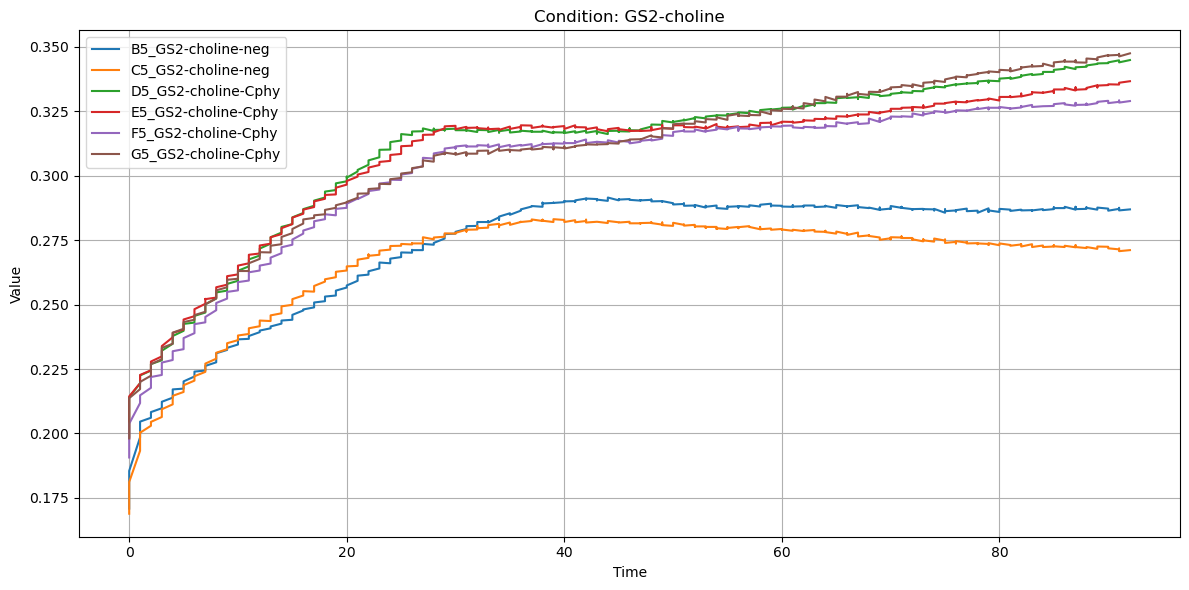

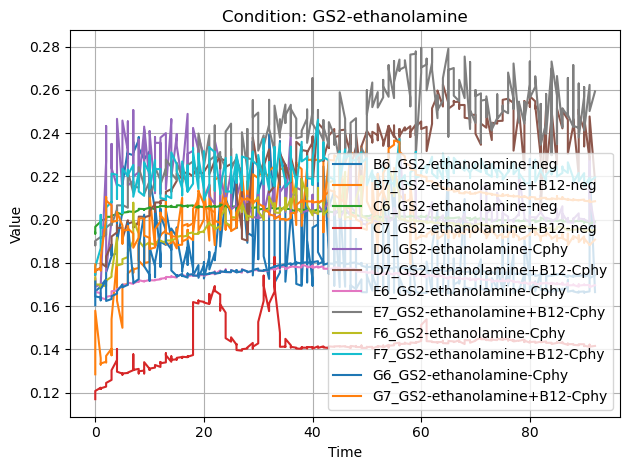

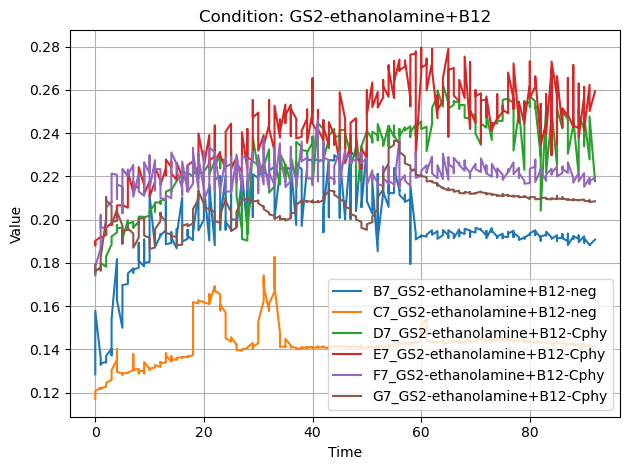

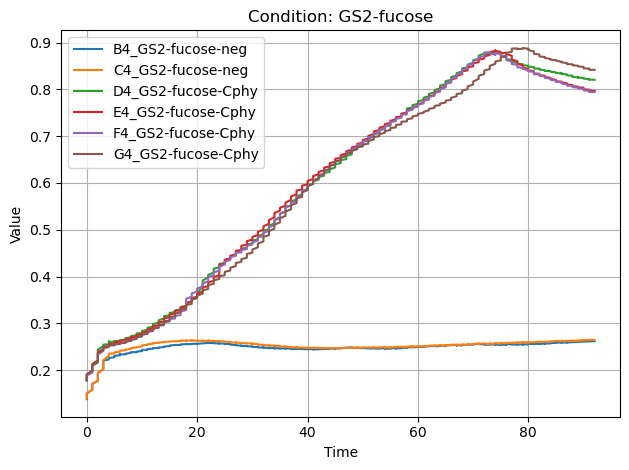

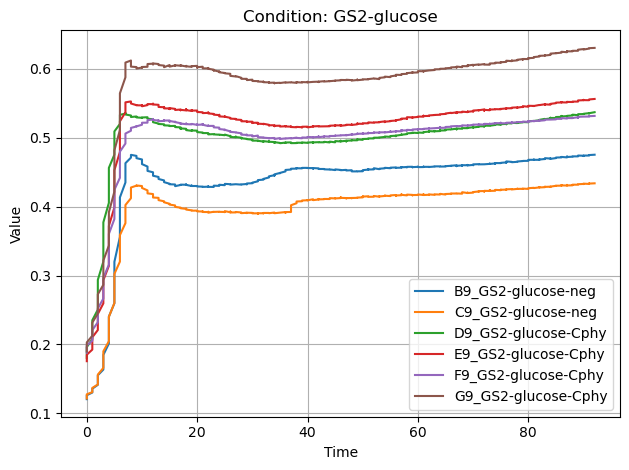

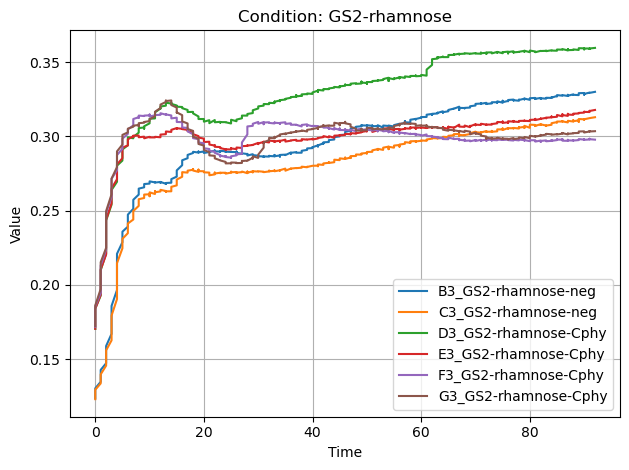

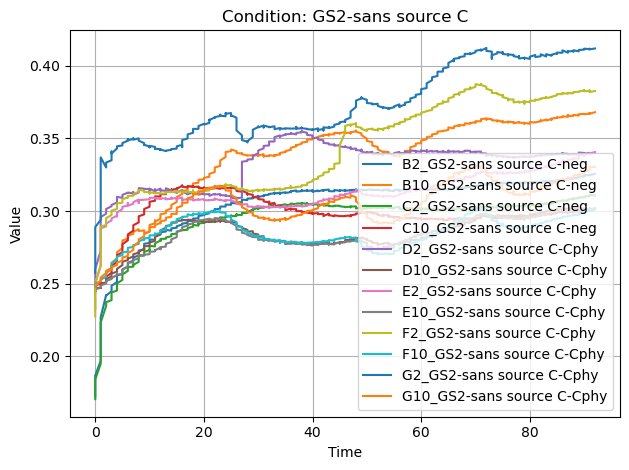

In [12]:
# Identify Conditions
# Extract unique conditions from column names
conditions = set()
for col in data_df.columns:
    if '-neg' in col:
        condition = col.split('-neg')[0].split('_')[-1]  # Extract condition name
        conditions.add(condition)

# Print identified conditions
print("Identified conditions:", conditions)
conditions = sorted(list(conditions))
print(conditions)

# Plot the data
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
for condition in conditions:
    # Get columns for the current condition (only non-negative controls)
    condition_cols = [col for col in data_df.columns if condition in col and col != 'Time']
    if not condition_cols:
        continue
    for col in condition_cols:
        if col in data_df.columns: # Check if the column still exists
           plt.plot(data_df['Time'], data_df[col], label=col)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Condition: {condition}')  # Add a title for each condition
    plt.legend()  # Add a legend to distinguish the lines
    plt.grid(True)  # Add gridlines for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show() #show the plot

# Substract the mean of the negative columns

Negative Control Columns: ['B2_GS2-sans source C-neg', 'B3_GS2-rhamnose-neg', 'B4_GS2-fucose-neg', 'B5_GS2-choline-neg', 'B6_GS2-ethanolamine-neg', 'B7_GS2-ethanolamine+B12-neg', 'B9_GS2-glucose-neg', 'B10_GS2-sans source C-neg', 'C2_GS2-sans source C-neg', 'C3_GS2-rhamnose-neg', 'C4_GS2-fucose-neg', 'C5_GS2-choline-neg', 'C6_GS2-ethanolamine-neg', 'C7_GS2-ethanolamine+B12-neg', 'C9_GS2-glucose-neg', 'C10_GS2-sans source C-neg']


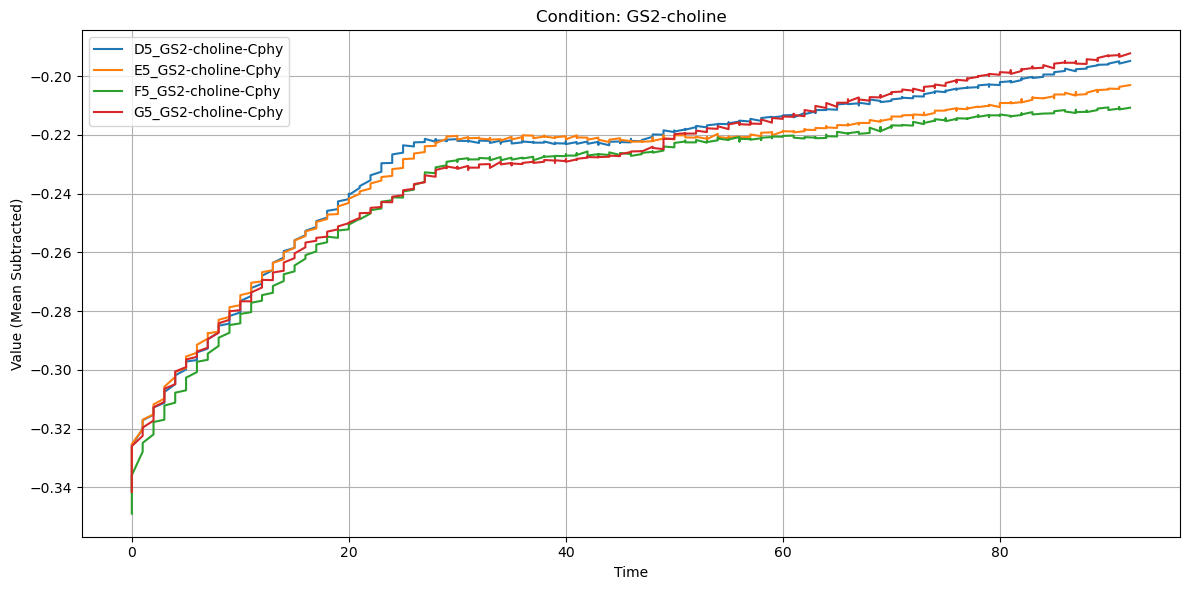

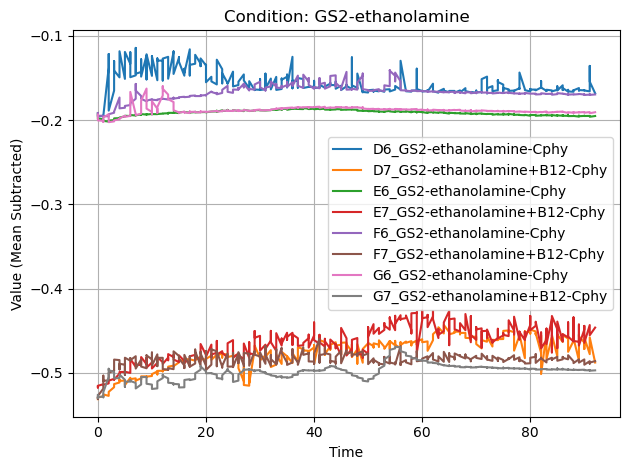

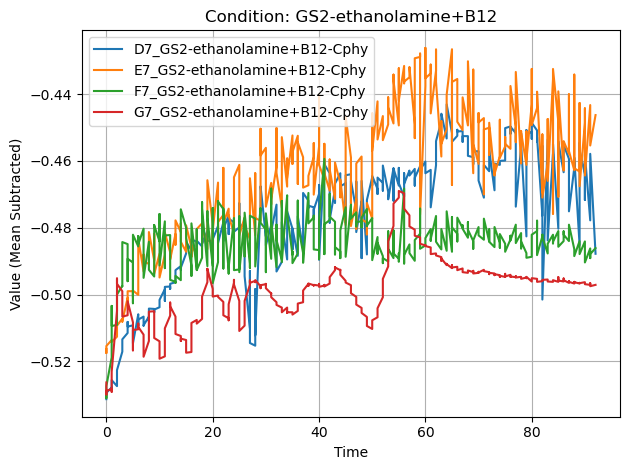

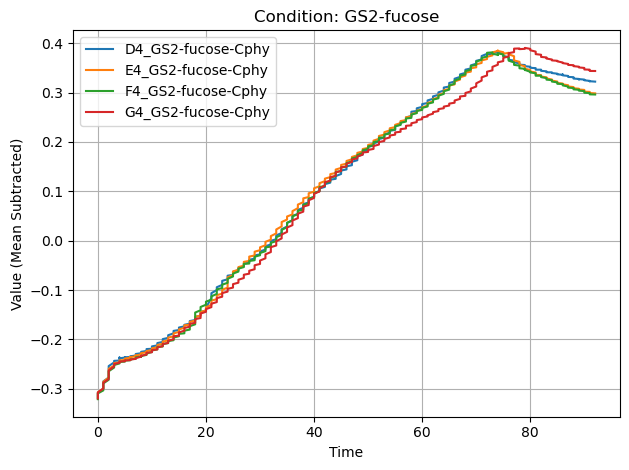

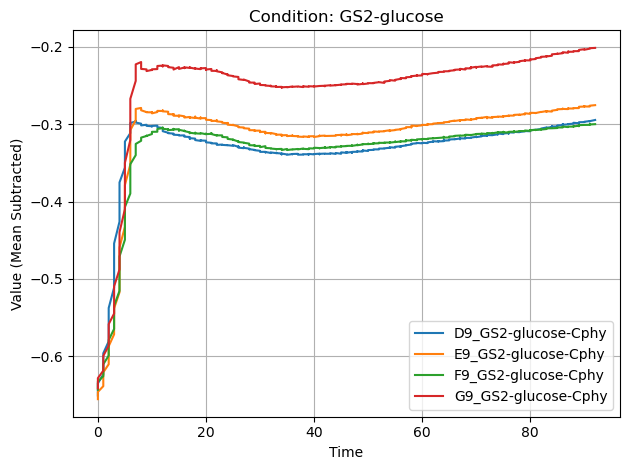

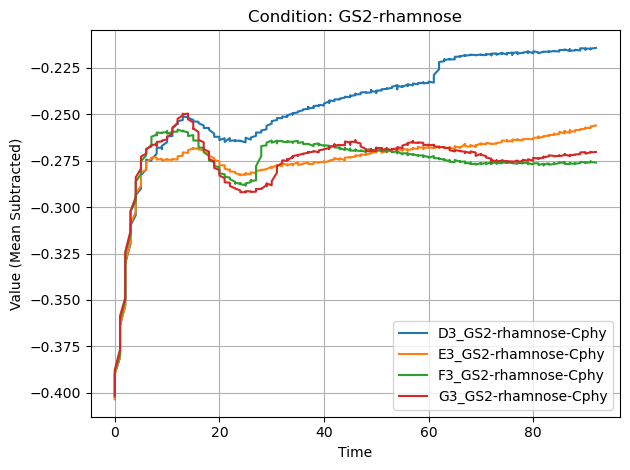

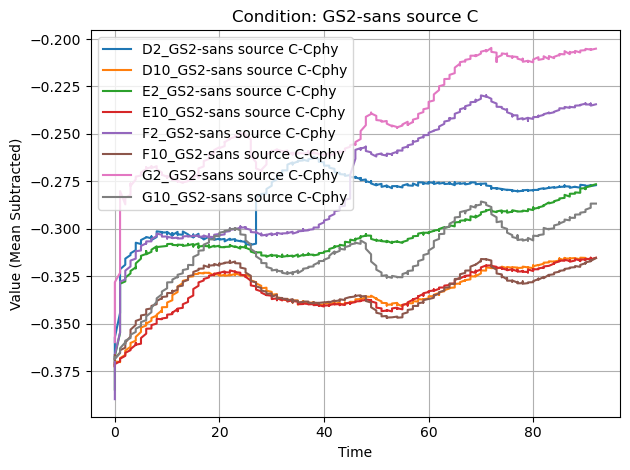

In [14]:
# 1. Identify Conditions
# Extract unique conditions from column names
#conditions = set()
#for col in data_df.columns:
#    if '-neg' in col:
#        condition = col.split('-neg')[0].split('_')[-1]  # Extract condition name
#        conditions.add(condition)

# Print identified conditions
#print("Identified conditions:", conditions)
#conditions = sorted(list(conditions))

# 2. Identify Negative Control Columns
negative_control_cols = [col for col in data_df.columns if col.endswith("-neg")]
print("Negative Control Columns:", negative_control_cols)

# 3. Calculate and Subtract Mean of Negative Controls
for condition in conditions:
    neg_cols = [col for col in negative_control_cols if condition in col]
    if not neg_cols:
        print(f"Warning: No negative control found for condition '{condition}'")
        continue  # Skip if no negative control

    # Calculate mean of the whole column for negative controls
    neg_mean = data_df[neg_cols].astype(float).mean().mean()

    # Get columns for the current condition (including controls and non-controls)
    condition_cols = [col for col in data_df.columns if condition in col]

    for col in condition_cols:
        if col not in neg_cols and col != 'Time':
            # Ensure the column exists before trying to subtract
            if col in data_df.columns:
                data_df[col] = data_df[col].astype(str).str.replace(',', '.', regex=False).astype(float)
                data_df[col] = data_df[col] - neg_mean
            else:
                print(f"Warning: Column {col} not found in DataFrame.")

# 4. Plot the data
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
for condition in conditions:
    # Get columns for the current condition (only non-negative controls)
    condition_cols = [col for col in data_df.columns if condition in col and col not in negative_control_cols and col != 'Time']
    if not condition_cols:
        continue
    for col in condition_cols:
        if col in data_df.columns: # Check if the column still exists
           plt.plot(data_df['Time'], data_df[col], label=col)
    plt.xlabel('Time')
    plt.ylabel('Value (Mean Subtracted)')
    plt.title(f'Condition: {condition}')  # Add a title for each condition
    plt.legend()  # Add a legend to distinguish the lines
    plt.grid(True)  # Add gridlines for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show() #show the plot


# Substract the mean of the negative time by time

Negative Control Columns: ['B2_GS2-sans source C-neg', 'B3_GS2-rhamnose-neg', 'B4_GS2-fucose-neg', 'B5_GS2-choline-neg', 'B6_GS2-ethanolamine-neg', 'B7_GS2-ethanolamine+B12-neg', 'B9_GS2-glucose-neg', 'B10_GS2-sans source C-neg', 'C2_GS2-sans source C-neg', 'C3_GS2-rhamnose-neg', 'C4_GS2-fucose-neg', 'C5_GS2-choline-neg', 'C6_GS2-ethanolamine-neg', 'C7_GS2-ethanolamine+B12-neg', 'C9_GS2-glucose-neg', 'C10_GS2-sans source C-neg']


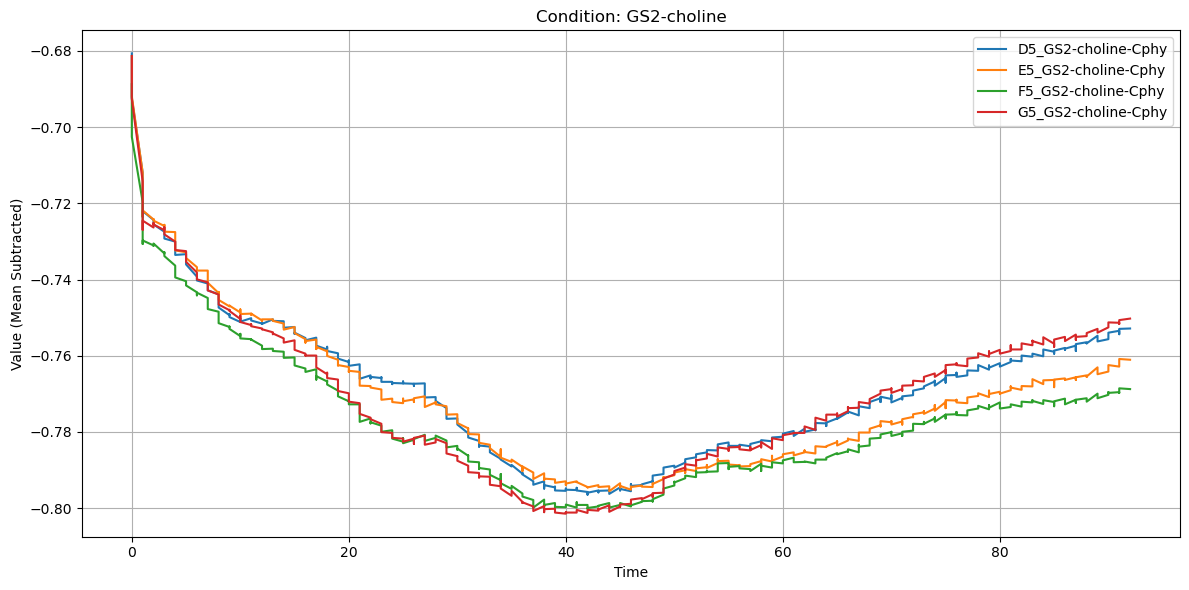

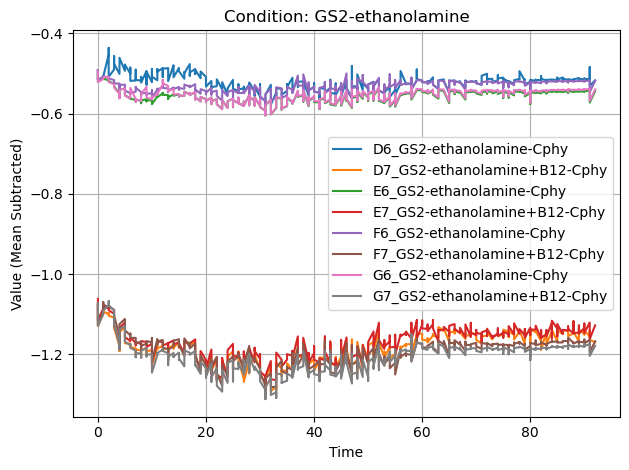

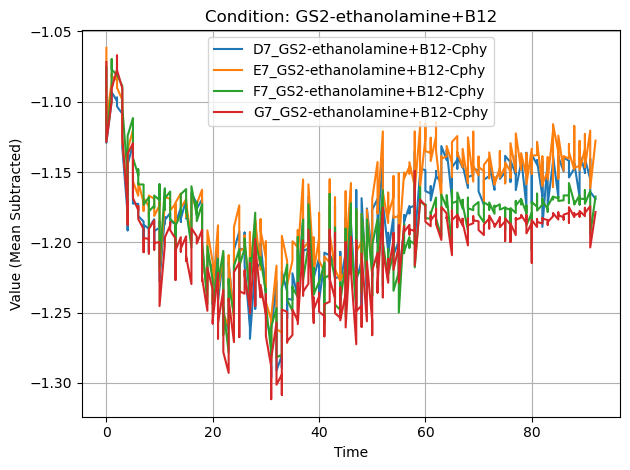

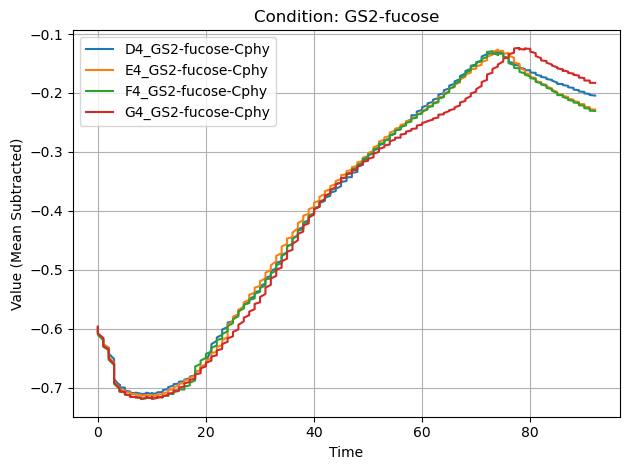

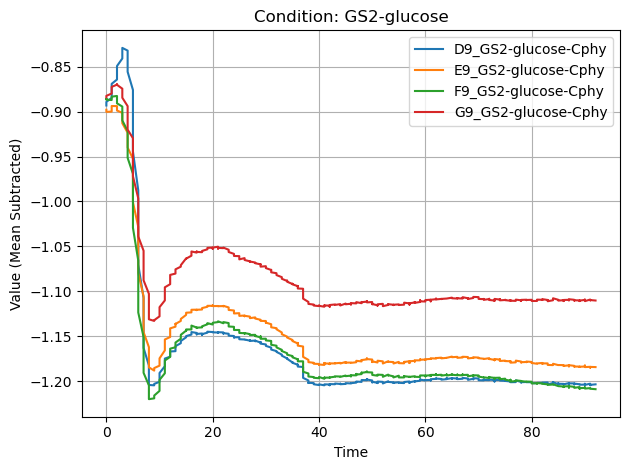

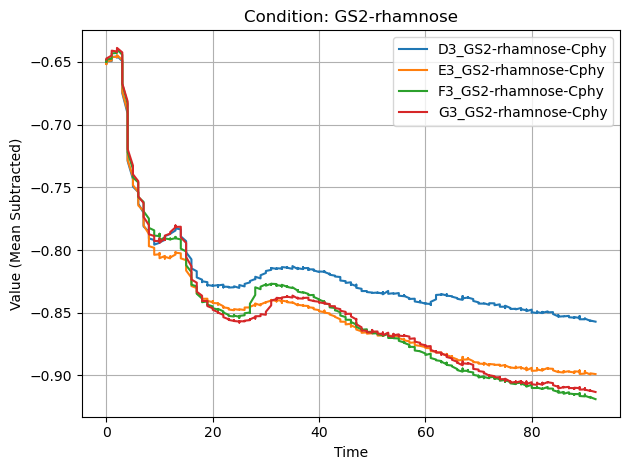

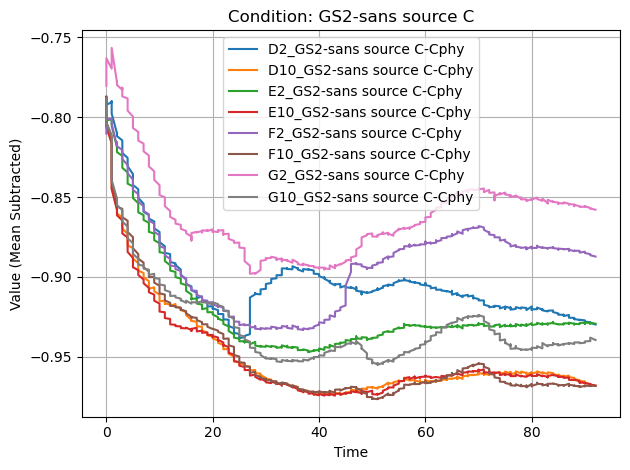

In [16]:
# 2. Identify Negative Control Columns
negative_control_cols = [col for col in data_df.columns if col.endswith("-neg")]
print("Negative Control Columns:", negative_control_cols)

# 3. Calculate and Subtract Mean of Negative Controls
for condition in conditions:
    neg_cols = [col for col in negative_control_cols if condition in col]
    if not neg_cols:
        print(f"Warning: No negative control found for condition '{condition}'")
        continue  # Skip if no negative control

    # Calculate mean of negative controls for each time point
    neg_mean = data_df[neg_cols].astype(float).mean(axis=1)

    # Get columns for the current condition (including controls and non-controls)
    condition_cols = [col for col in data_df.columns if condition in col]

    for col in condition_cols:
        if col not in neg_cols and col != 'Time':
            # Ensure the column exists before trying to subtract
            if col in data_df.columns:
                df_col_float = data_df[col].astype(str).str.replace(',', '.', regex=False).astype(float)
                data_df[col] = df_col_float - neg_mean
            else:
                print(f"Warning: Column {col} not found in DataFrame.")

# 4. Plot the data
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
for condition in conditions:
    # Get columns for the current condition (only non-negative controls)
    condition_cols = [col for col in data_df.columns if condition in col and col not in negative_control_cols and col != 'Time']
    if not condition_cols:
        continue
    for col in condition_cols:
        if col in data_df.columns: # Check if the column still exists
           plt.plot(data_df['Time'], data_df[col], label=col)
    plt.xlabel('Time')
    plt.ylabel('Value (Mean Subtracted)')
    plt.title(f'Condition: {condition}')  # Add a title for each condition
    plt.legend()  # Add a legend to distinguish the lines
    plt.grid(True)  # Add gridlines for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show() #show the plot

# Select which column use as negative

this one:B6_GS2-ethanolamine-neg
this one:B6_GS2-ethanolamine-neg
this one:B6_GS2-ethanolamine-neg
this one:B6_GS2-ethanolamine-neg
this one:B6_GS2-ethanolamine-neg
this one:B6_GS2-ethanolamine-neg
this one:B6_GS2-ethanolamine-neg


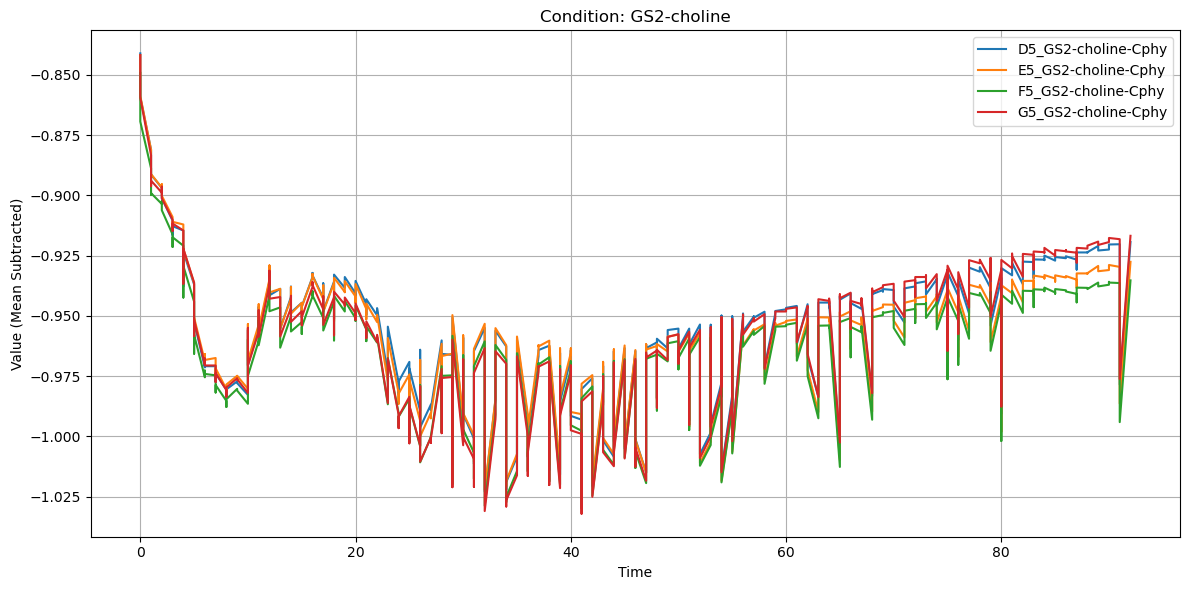

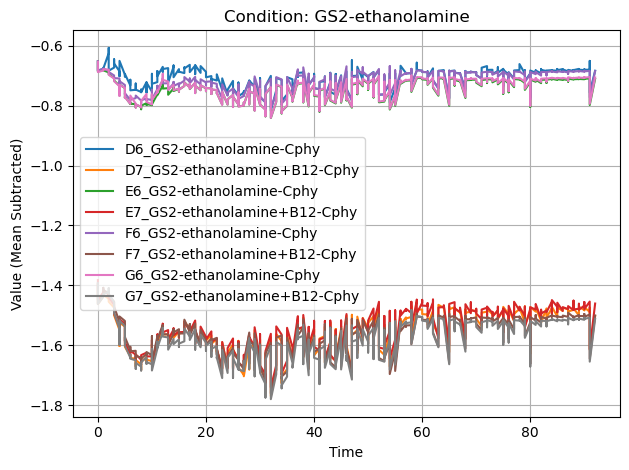

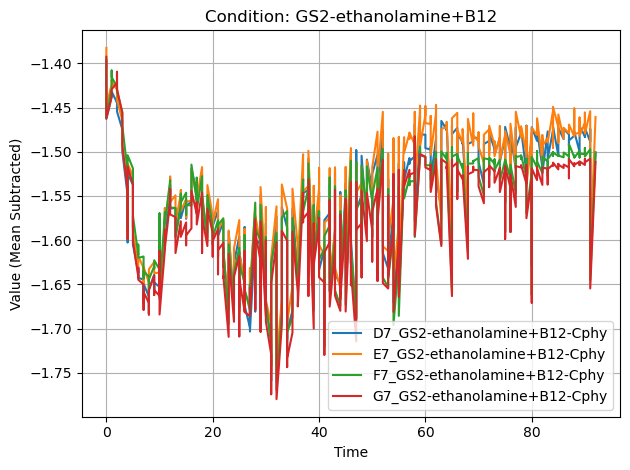

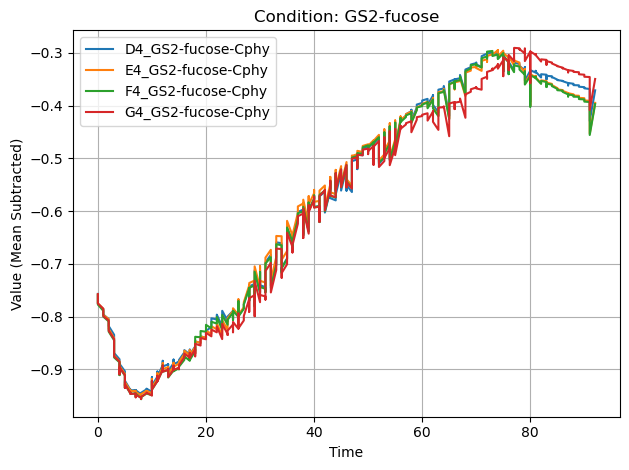

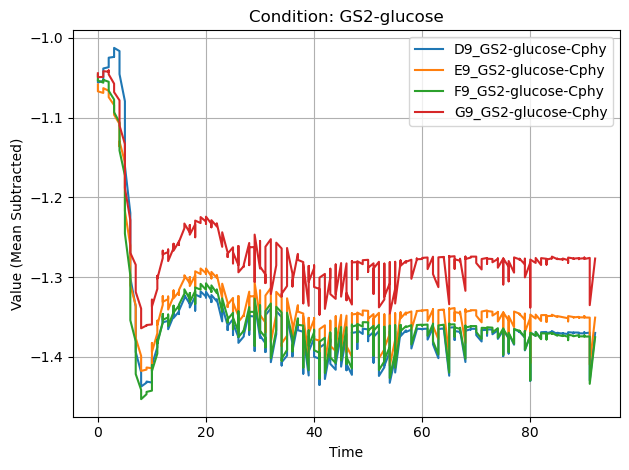

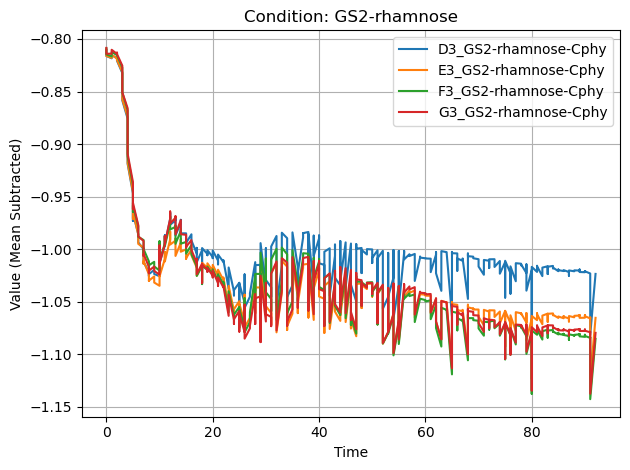

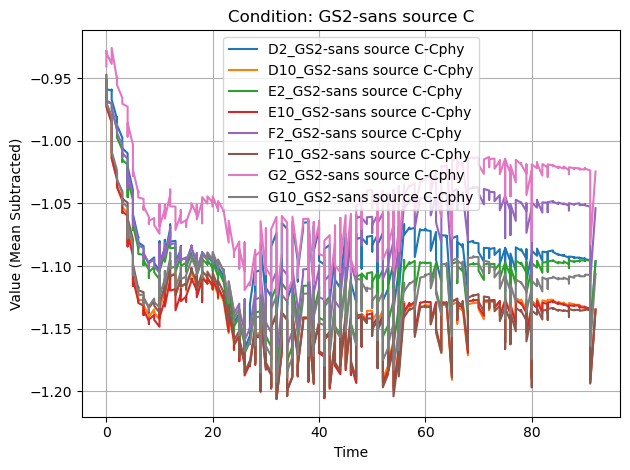

In [17]:
# 3. Calculate and Subtract Mean of Negative Controls
for condition in conditions:
    neg_cols = [col for col in negative_control_cols if condition in col]
    if not neg_cols:
        print(f"Warning: No negative control found for condition '{condition}'")
        continue  # Skip if no negative control

    # Use only the first negative control column
    first_neg_col = "B6_GS2-ethanolamine-neg"
    print("this one:" +first_neg_col)
    neg_values = data_df[first_neg_col].astype(str).str.replace(',', '.', regex=False).astype(float)

    # Get columns for the current condition (including controls and non-controls)
    condition_cols = [col for col in data_df.columns if condition in col]

    for col in condition_cols:
        if col not in neg_cols and col != 'Time':
            # Ensure the column exists before trying to subtract
            if col in data_df.columns:
                df_col_float = data_df[col].astype(str).str.replace(',', '.', regex=False).astype(float)
                data_df[col] = df_col_float - neg_values
            else:
                print(f"Warning: Column {col} not found in DataFrame.")

# 4. Plot the data
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
for condition in conditions:
    # Get columns for the current condition (only non-negative controls)
    condition_cols = [col for col in data_df.columns if condition in col and col not in negative_control_cols and col != 'Time']
    if not condition_cols:
        continue
    for col in condition_cols:
        if col in data_df.columns: # Check if the column still exists
           plt.plot(data_df['Time'], data_df[col], label=col)
    plt.xlabel('Time')
    plt.ylabel('Value (Mean Subtracted)')
    plt.title(f'Condition: {condition}')  # Add a title for each condition
    plt.legend()  # Add a legend to distinguish the lines
    plt.grid(True)  # Add gridlines for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show() #show the plot
